## Health Professional Shortage Areas - Exploratory Data Analysis 
Data from 1978 to 2020, and combined census track

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

pd.options.display.max_columns = 100
plt.style.use('seaborn-dark-palette')

In [2]:
file_name = '03_cleaned_hpsas_filtered.csv'
file_path = '../datasets/'

In [3]:
hpsa = pd.read_csv(file_path + file_name)
hpsa.head(3)

,HPSA Designation Date,HPSA Name,Designation Type,HPSA Score,HPSA Status,HPSA Designation Last Update Date,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,Primary HHS Region Name,Rural Status,Longitude,Latitude,Common County Name,Common State County FIPS Code,County Equivalent Name,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Provider Ratio Goal,HPSA Shortage,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Designation,State Population
0,1978-01-23,Warren,Geographic HPSA,0,Withdrawn,1995-10-02,Not applicable,1995-10-02,1.0,83300.0,5.4,0,Region 2,NaN,NaN,NaN,"Warren County, NJ",34041,Warren,Single County,Geographic Population,0.0,0.0,NaN,NaN,New Jersey,N,N,Geographic,8882190.0
1,1978-04-07,Halifax Mental Health Catchment Area,Geographic HPSA,0,Withdrawn,2011-11-03,Not applicable,2011-11-03,3.0,0.0,NaN,0,Region 4,Rural,NaN,NaN,"Halifax County, NC",37083,Halifax,Single County,Geographic Population,0.0,0.0,NaN,0.0,North Carolina,N,N,Geographic,10488084.0
2,1978-04-24,Metropolitan State Hospital,State Mental Hospital,0,Withdrawn,1986-08-19,Not applicable,1986-08-19,22.0,0.0,NaN,0,Region 9,Partially Rural,-119.27023,36.374106,"Tulare County, CA",06107,Tulare,Unknown,State Mental Hospital,0.0,0.0,300:1,0.0,California,U,N,Facility,39512223.0


In [4]:
# Set the date column to the index in the dataframe for graphs below
date_columns = [column for column in hpsa.columns if 'Date' in column]
for column in date_columns:
    hpsa[column] = pd.to_datetime(hpsa[column])

In [5]:
hpsa.set_index('HPSA Designation Date', inplace = True)
hpsa.sort_index(inplace = True)

### Evaluating Trends over Time

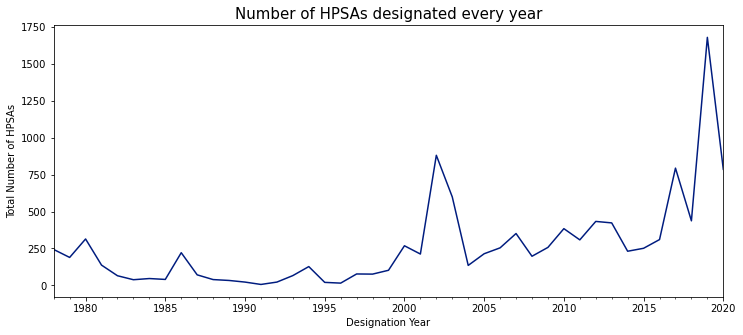

In [6]:
plt.figure(figsize=(12,5))
hpsa.resample('Y')['Designation'].count().plot()
plt.title('Number of HPSAs designated every year', fontsize = 15)
plt.xlabel('Designation Year')
plt.ylabel('Total Number of HPSAs');

The number of HPSAs was stable from 2004 to 2016. It has been increasing since this year and it had a big jump in 2019.

### Designated vs Withdrawn HPSAs

In [7]:
hpsa['HPSA Status'].value_counts()

Designated    7385
Withdrawn     3989
Name: HPSA Status, dtype: int64

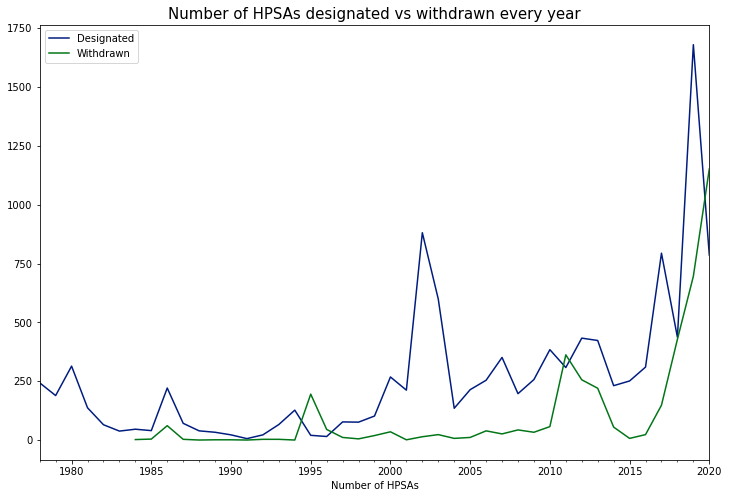

In [8]:
target_1 = hpsa.copy()
target_2 = hpsa[hpsa['HPSA Status']=='Withdrawn'].set_index('HPSA Designation Last Update Date')

figure_1 = target_1.resample('Y')['HPSA Status'].count().plot(figsize = (12,8), label = 'Designated')
figure_2 = target_2.resample('Y')['HPSA Status'].count().plot(figsize = (12,8), label = 'Withdrawn')

plt.title('Number of HPSAs designated vs withdrawn every year', fontsize=15)
plt.xlabel('Number of HPSAs')

plt.legend();

There are designated HPSAs that have not been withdrawn over the years.

### Type of HPSAs

In [90]:
hpsa['Designation'].value_counts()

Facility      6175
Geographic    3921
Population    1278
Name: Designation, dtype: int64

Total number of HPSAs for type Facility is 6175.
Number of HPSAs for type Facility in 2020: 446.
Total number of HPSAs for type Geographic is 3921.
Number of HPSAs for type Geographic in 2020: 191.
Total number of HPSAs for type Population is 1278.
Number of HPSAs for type Population in 2020: 149.


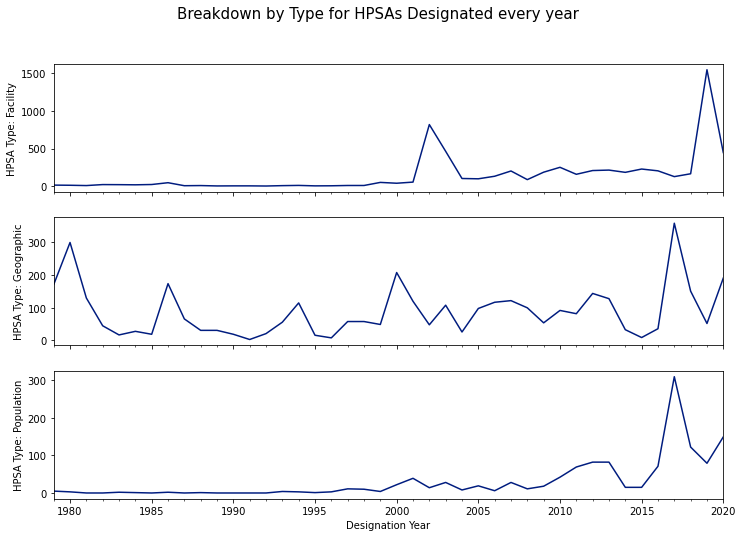

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True);
designations = ['Facility', 'Geographic', 'Population']
for ix, desig in enumerate(designations):
    hpsa[hpsa['Designation']==desig].resample('Y')['Designation'].count().plot(ax=axes[ix])
    axes[ix].set_ylabel(f'HPSA Type: {desig}')
    temp = hpsa[hpsa['Designation']==desig].resample('Y')['Designation'].count()
    print(f'Total number of HPSAs for type {desig} is {temp.sum()}.')
    print(f'Number of HPSAs for type {desig} in 2020: {temp[-1]}.')
    
plt.xlabel('Designation Year')
plt.suptitle('Breakdown by Type for HPSAs Designated every year', fontsize=15);
plt.show();

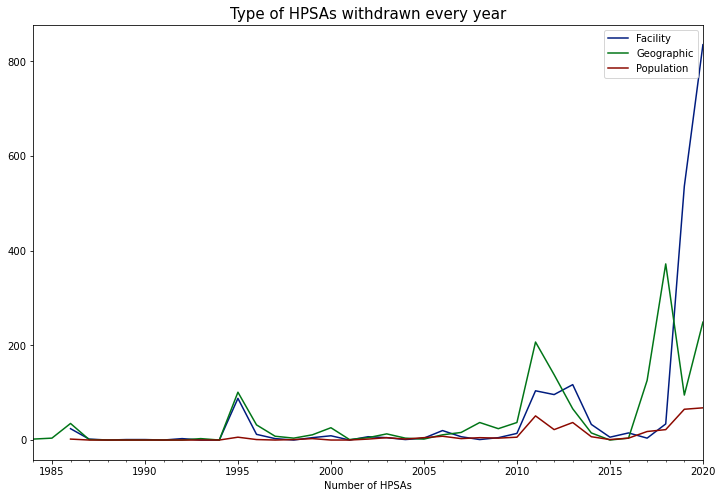

In [15]:
withdrawn = hpsa[hpsa['HPSA Status']=='Withdrawn']
target_1 = withdrawn[withdrawn['Designation']=='Facility'].set_index('HPSA Designation Last Update Date')
target_2 = withdrawn[withdrawn['Designation']=='Geographic'].set_index('HPSA Designation Last Update Date')
target_3 = withdrawn[withdrawn['Designation']=='Population'].set_index('HPSA Designation Last Update Date')

figure_1 = target_1.resample('Y')['HPSA Status'].count().plot(figsize = (12,8), label = 'Facility')
figure_2 = target_2.resample('Y')['HPSA Status'].count().plot(figsize = (12,8), label = 'Geographic')
figure_3 = target_3.resample('Y')['HPSA Status'].count().plot(figsize = (12,8), label = 'Population')

plt.title('Type of HPSAs withdrawn every year', fontsize=15)
plt.xlabel('Number of HPSAs')

plt.legend();

#### Looking at the uptake of Facilities HPSA in 2019:

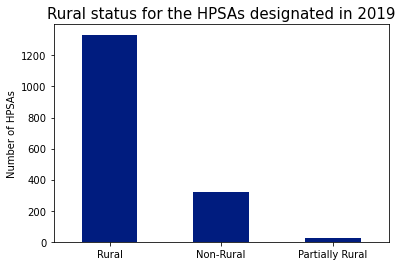

In [16]:
hpsa_2019 = hpsa['2019']
hpsa_2019['Rural Status'].value_counts().plot.bar()
plt.title('Rural status for the HPSAs designated in 2019', fontsize=15)
plt.ylabel('Number of HPSAs')
plt.xticks(rotation=0);

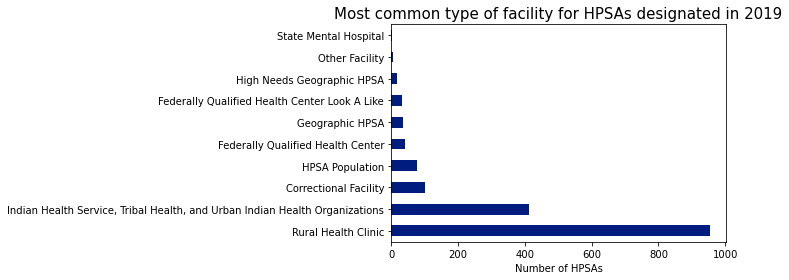

In [17]:
hpsa_2019['Designation Type'].value_counts().plot.barh()
plt.title('Most common type of facility for HPSAs designated in 2019', fontsize=15)
plt.xlabel('Number of HPSAs');

In [18]:
hpsa_2019['Designation Type'].value_counts()

Rural Health Clinic                                                            954
Indian Health Service, Tribal Health, and Urban Indian Health Organizations    412
Correctional Facility                                                          101
HPSA Population                                                                 79
Federally Qualified Health Center                                               42
Geographic HPSA                                                                 35
Federally Qualified Health Center Look A Like                                   33
High Needs Geographic HPSA                                                      17
Other Facility                                                                   5
State Mental Hospital                                                            2
Name: Designation Type, dtype: int64

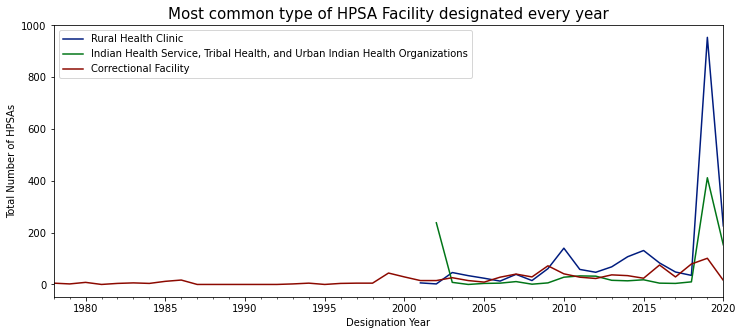

In [19]:
plt.figure(figsize=(12,5))
center_1='Rural Health Clinic'
center_2='Indian Health Service, Tribal Health, and Urban Indian Health Organizations'
center_3='Correctional Facility'
hpsa[hpsa['Designation Type']==center_1].resample('Y')['Designation'].count().plot(label=center_1)
hpsa[hpsa['Designation Type']==center_2].resample('Y')['Designation'].count().plot(label=center_2)
hpsa[hpsa['Designation Type']==center_3].resample('Y')['Designation'].count().plot(label=center_3)
plt.title('Most common type of HPSA Facility designated every year', fontsize = 15)
plt.xlabel('Designation Year')
plt.ylabel('Total Number of HPSAs')
plt.legend();

### HPSAs in counties near the Mexico Border

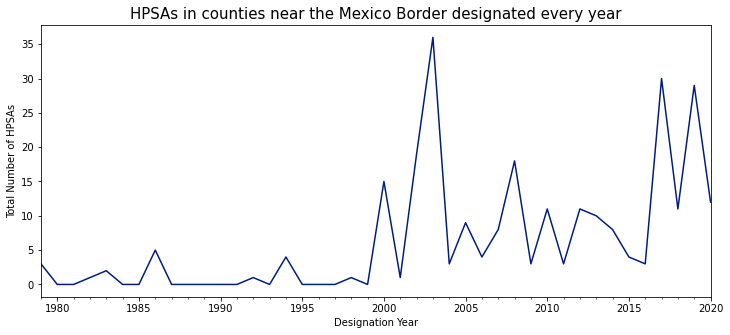

In [20]:
plt.figure(figsize=(12,5))
hpsa[hpsa['U.S. - Mexico Border County Indicator']=='Y'].resample('Y')['Designation'].count().plot()
plt.title('HPSAs in counties near the Mexico Border designated every year', fontsize = 15)
plt.xlabel('Designation Year')
plt.ylabel('Total Number of HPSAs');

### What are the states with limited access to a pyschiatrist?

In [21]:
hpsa_state = hpsa.groupby('State Name')[['Designation']].count()
hpsa_state.reset_index(inplace = True)

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

us_map = folium.Map(location = [37.6, -95.665],
                     tiles='cartodbpositron',
                       zoom_start = 3)
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=hpsa_state,
    columns=['State Name', 'Designation'],
    key_on='feature.properties.name',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of HPSAs'
).add_to(us_map)

folium.LayerControl().add_to(us_map)

us_map

### What are the states with increasing need for access to mental health?

<Figure size 432x288 with 0 Axes>

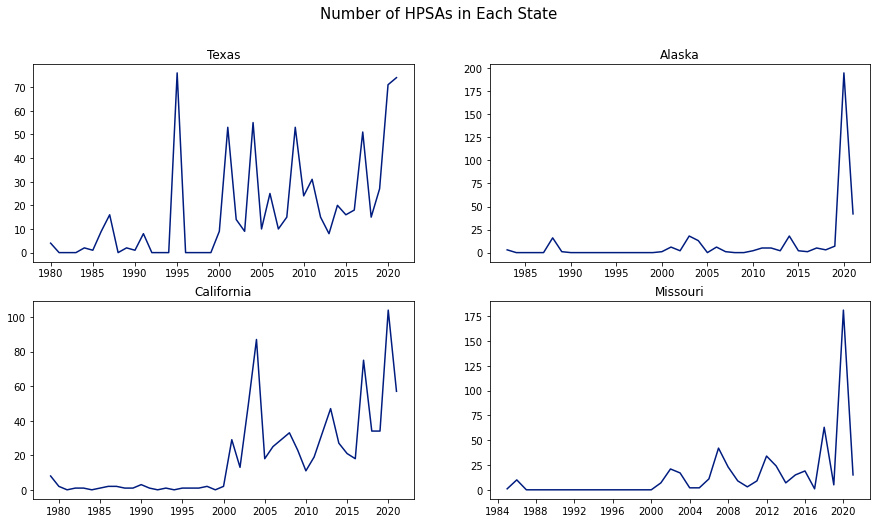

In [22]:
plt.tight_layout();
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8));

axs[0, 0].plot(hpsa[hpsa['State Name']=='Texas'].resample('Y')['State Name'].count())
axs[0, 0].set_title('Texas')
axs[1, 0].plot(hpsa[hpsa['State Name']=='California'].resample('Y')['State Name'].count())
axs[1, 0].set_title('California')
axs[0, 1].plot(hpsa[hpsa['State Name']=='Alaska'].resample('Y')['State Name'].count())
axs[0, 1].set_title('Alaska')
axs[1, 1].plot(hpsa[hpsa['State Name']=='Missouri'].resample('Y')['State Name'].count())
axs[1, 1].set_title('Missouri')


plt.suptitle('Number of HPSAs in Each State', fontsize=15);

### Analyzing each state in the graphs above:

In [23]:
hpsa_2019[hpsa_2019['State Name']=='Alaska']['Designation Type'].value_counts()

Indian Health Service, Tribal Health, and Urban Indian Health Organizations    195
Name: Designation Type, dtype: int64

In [24]:
hpsa_2019[hpsa_2019['State Name']=='Alaska']['County Equivalent Name'].value_counts()[:3]

Bethel           34
Yukon-Koyukuk    31
Nome             14
Name: County Equivalent Name, dtype: int64

In [25]:
hpsa_2019[hpsa_2019['State Name']=='Missouri']['Designation Type'].value_counts()

Rural Health Clinic                                                            176
Federally Qualified Health Center                                                2
Indian Health Service, Tribal Health, and Urban Indian Health Organizations      1
Correctional Facility                                                            1
Federally Qualified Health Center Look A Like                                    1
Name: Designation Type, dtype: int64

In [26]:
hpsa_2019[hpsa_2019['State Name']=='Missouri']['County Equivalent Name'].value_counts()[:3]

Polk        7
Howell      7
Crawford    6
Name: County Equivalent Name, dtype: int64

In [27]:
hpsa_2019[hpsa_2019['State Name']=='Texas']['Designation Type'].value_counts()

Rural Health Clinic                                                            35
Geographic HPSA                                                                19
Correctional Facility                                                           6
HPSA Population                                                                 6
Indian Health Service, Tribal Health, and Urban Indian Health Organizations     3
Federally Qualified Health Center Look A Like                                   1
Other Facility                                                                  1
Name: Designation Type, dtype: int64

In [28]:
hpsa_2019[hpsa_2019['State Name']=='California']['Designation Type'].value_counts()

Indian Health Service, Tribal Health, and Urban Indian Health Organizations    49
Rural Health Clinic                                                            29
Federally Qualified Health Center                                               9
Federally Qualified Health Center Look A Like                                   9
Correctional Facility                                                           5
High Needs Geographic HPSA                                                      3
Name: Designation Type, dtype: int64

In [29]:
hpsa_2019[hpsa_2019['State Name']=='California']['County Equivalent Name'].value_counts()[:3]

Los Angeles    11
Riverside       8
Inyo            5
Name: County Equivalent Name, dtype: int64

### Relationship between poverty level and access to mental health

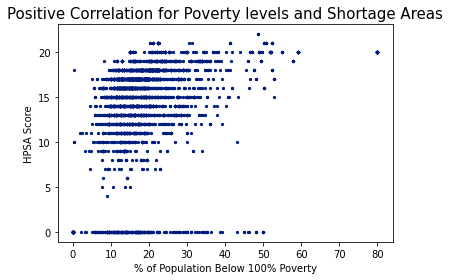

In [30]:
plt.scatter(hpsa['% of Population Below 100% Poverty'], hpsa['HPSA Score'], s = 5)
plt.title('Positive Correlation for Poverty levels and Shortage Areas', fontsize=15)
plt.xlabel('% of Population Below 100% Poverty')
plt.ylabel('HPSA Score');